# Lab 11: Clustering

In this lab you will explore K-Means.

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster

## Vanilla Example

Let us begin with a toy dataset with three groups that are completely separated with the variables given. There are the same number of points per group and the same variance within each group.

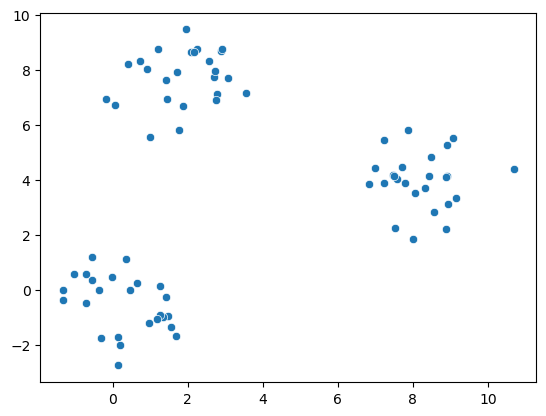

In [59]:
np.random.seed(1337)

c1 = np.random.normal(size = (25, 2))
c2 = np.array([2, 8]) + np.random.normal(size = (25, 2))
c3 = np.array([8, 4]) + np.random.normal(size = (25, 2))

x1 = np.vstack((c1, c2, c3))

sns.scatterplot(x = x1[:, 0], y = x1[:, 1]);

Running the K-Means algorithm, we can see that it is able to accurately pick out the three initial clusters. 

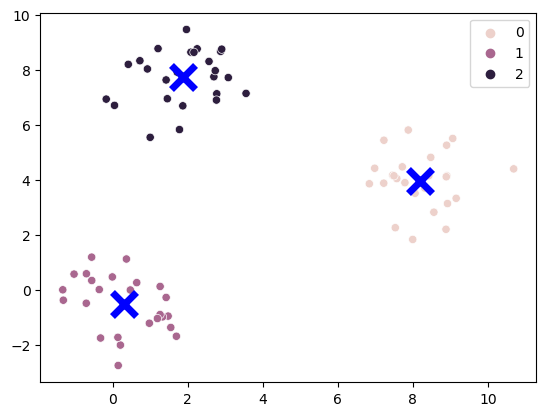

In [60]:
kmeans = cluster.KMeans(n_clusters = 3, random_state = 42).fit(x1)
sns.scatterplot(x = x1[:, 0], y = x1[:, 1], hue = kmeans.labels_)
sns.scatterplot(x = kmeans.cluster_centers_[:, 0], y = kmeans.cluster_centers_[:, 1], color = 'blue', marker = 'x', s = 300, linewidth = 5);

## Question 1

In the previous example, the K-Means algorithm was able to accurately find the three initial clusters. However, changing the starting centers for K-Means can change the final clusters that K-Means gives us. Change the initial centers to the points `[0, 1]`, `[1, 1]`, and `[2, 2]`; and fit a [`cluster.KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) object called `kmeans_q1` on the toy dataset from the previous example. Keep the `random_state` parameter as 42 and the `n_clusters` parameter as 3.

**Hint:** You will need to change the `init` and `n_init = 1` parameters in `cluster.KMeans`. You may find this link helpful: https://stackoverflow.com/questions/38355153/initial-centroids-for-scikit-learn-kmeans-clustering

<!--
BEGIN QUESTION
name: q1
-->

In [61]:
kmeans_q1 = cluster.KMeans(n_clusters=3, init=np.array([[0, 1], [1, 1], [2, 2]]), n_init=1, random_state=42).fit(x1)

Running the K-Means algorithm with these centers gives us a different result from before, and this particular run of K-Means was unable to accurately find the three initial clusters.

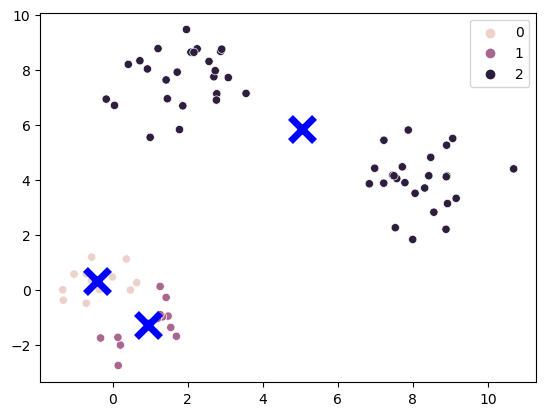

In [62]:
sns.scatterplot(x = x1[:, 0], y = x1[:, 1], hue = kmeans_q1.labels_)
sns.scatterplot(x = kmeans_q1.cluster_centers_[:, 0], y = kmeans_q1.cluster_centers_[:, 1], color = 'blue', marker = 'x', s = 300, linewidth = 5);

## Question 2

Sometimes, K-Means will have a difficult time finding the "correct" clusters even with ideal starting centers. For example, consider the data below. There are two groups of different sizes in two different senses. The smaller group has both smaller variability and is less numerous, and the larger of the two groups is more diffuse and populated.

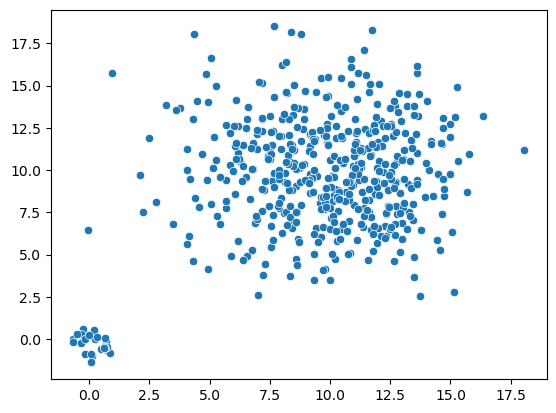

In [63]:
np.random.seed(1337)

c1 = 0.5 * np.random.normal(size = (25, 2))
c2 = np.array([10, 10]) + 3 * np.random.normal(size = (475, 2))

x2 = np.vstack((c1, c2))

sns.scatterplot(x = x2[:, 0], y = x2[:, 1]);

### Question 2

Fit a `cluster.KMeans` object called `kmeans_q2a` on the dataset above with two clusters and a `random_state` parameter of 42.

<!--
BEGIN QUESTION
name: q2a
-->

In [64]:
kmeans_q2a = kmeans_q2a = cluster.KMeans(n_clusters=2, random_state=42).fit(x2)

(For notational simplicity we will call the initial cluster on the bottom left $A$ and the initial cluster on the top right $B$. We will call the bottom left cluster found by K-Means as cluster $a$ and the top right cluster found by K-Means as cluster $b$.) 

As seen below, K-Means is unable to find the two intial clusters because cluster $A$ includes points from cluster $B$. Recall that K-Means attempts to minimize inertia, so it makes sense that points in the bottom left of cluster $B$ would prefer to be in cluster $A$ rather than cluster $B$. If these points were in cluster $B$ instead, then the resulting cluster assignments would have a larger distortion.

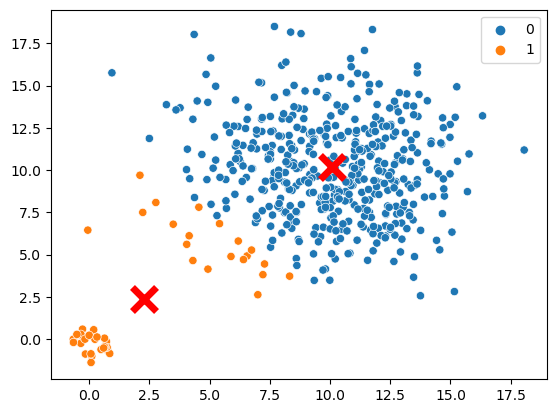

In [65]:
sns.scatterplot(x = x2[:, 0], y = x2[:, 1], hue = kmeans_q2a.labels_)
sns.scatterplot(x = kmeans_q2a.cluster_centers_[:, 0], y = kmeans_q2a.cluster_centers_[:, 1], color = 'red', marker = 'x', s = 300, linewidth = 5);

## Question 3

In the previous questions, we looked at clustering on two dimensional datasets. However, we can easily use clustering on data which have more than two dimensions. For this, let us turn to a World Bank dataset, containing various features for the world's countries.

This data comes from https://databank.worldbank.org/source/world-development-indicators#.


In [66]:
world_bank_data = pd.read_csv("world_bank_data.csv", index_col = 'country')
world_bank_data.head(5)

,Age dependency ratio (% of working-age population),"Age dependency ratio, old (% of working-age population)","Age dependency ratio, young (% of working-age population)","Bird species, threatened",Business extent of disclosure index (0=less disclosure to 10=more disclosure),"Contributing family workers, female (% of female employment) (modeled ILO estimate)","Contributing family workers, male (% of male employment) (modeled ILO estimate)","Contributing family workers, total (% of total employment) (modeled ILO estimate)",Cost of business start-up procedures (% of GNI per capita),"Cost of business start-up procedures, female (% of GNI per capita)",...,"Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)",Urban population,Urban population (% of total population),Urban population growth (annual %),"Vulnerable employment, female (% of female employment) (modeled ILO estimate)","Vulnerable employment, male (% of male employment) (modeled ILO estimate)","Vulnerable employment, total (% of total employment) (modeled ILO estimate)","Wage and salaried workers, female (% of female employment) (modeled ILO estimate)","Wage and salaried workers, male (% of male employment) (modeled ILO estimate)","Wage and salaried workers, total (% of total employment) (modeled ILO estimate)"
country,,,,,,,,,,,,,,,,,,,,,
Algeria,57.508032,10.021442,47.486590,15.0,4.0,2.720000,1.836,1.978000,0.0,11.8,...,29.952999,30670086.0,72.629,2.804996,24.337001,27.227001,26.762000,73.734001,68.160004,69.056000
Afghanistan,84.077656,4.758273,79.319383,16.0,8.0,71.780998,9.606,31.577999,0.0,6.4,...,2.639000,9477100.0,25.495,3.350383,95.573997,85.993001,89.378998,4.282000,13.292000,10.108000
Albania,45.810037,20.041214,25.768823,8.0,9.0,37.987000,20.795,28.076000,0.0,11.3,...,30.979000,1728969.0,60.319,1.317162,54.663000,54.994001,54.854000,44.320999,41.542999,42.720001
American Samoa,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,48339.0,87.153,-0.299516,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,67813.0,88.062,-0.092859,NaN,NaN,NaN,NaN,NaN,NaN


There are some missing values. For the sake of convenience and of keeping the lab short, we will fill them all with zeros. 

In [67]:
world_bank_data = world_bank_data.fillna(0)



Below, fit a `cluster.KMeans` object called `kmeans_q3` with four clusters and a `random_state` parameter of 42.

Make sure you should use a centered and scaled version of the world bank data. By centered and scaled we mean that the mean in each column should be zero and the variance should be 1.

<!--
BEGIN QUESTION
name: q4
-->

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(world_bank_data)

StandardScaler()

In [69]:
kmeans_q3 = cluster.KMeans(n_clusters=4, random_state=42).fit(scaler.transform(world_bank_data))

Looking at these new clusters, we see that they seem to correspond to:

0: Very small countries.

1: Developed countries.

2: Less developed countries.

3: Huge countries.

In [70]:
labeled_world_bank_data_q3 = pd.Series(kmeans_q3.labels_, name = "cluster", index  = world_bank_data.index).to_frame()

In [71]:
list(labeled_world_bank_data_q3.query('cluster == 0').index)

['American Samoa',
 'Andorra',
 'Aruba',
 'Bermuda',
 'British Virgin Islands',
 'Cayman Islands',
 'Curacao',
 'Dominica',
 'Faroe Islands',
 'Gibraltar',
 'Greenland',
 'Isle of Man',
 'Kosovo',
 'Liechtenstein',
 'Marshall Islands',
 'Monaco',
 'Nauru',
 'Northern Mariana Islands',
 'Palau',
 'San Marino',
 'Sint Maarten (Dutch part)',
 'St. Kitts and Nevis',
 'St. Martin (French part)',
 'Turks and Caicos Islands',
 'Tuvalu']

In [72]:
list(labeled_world_bank_data_q3.query('cluster == 1').index)

['Albania',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belgium',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Canada',
 'Channel Islands',
 'Chile',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'El Salvador',
 'Estonia',
 'Finland',
 'France',
 'French Polynesia',
 'Georgia',
 'Germany',
 'Greece',
 'Grenada',
 'Guam',
 'Hong Kong SAR, China',
 'Hungary',
 'Iceland',
 'Iran, Islamic Rep.',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Korea, Rep.',
 'Kuwait',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Luxembourg',
 'Macao SAR, China',
 'Malaysia',
 'Maldives',
 'Malta',
 'Mauritius',
 'Mexico',
 'Moldova',
 'Montenegro',
 'Netherlands',
 'New Caledonia',
 'New Zealand',
 'North Macedonia',
 'Norway',
 'Oman',
 'Panama',
 'Poland',
 'Portugal',

In [73]:
list(labeled_world_bank_data_q3.query('cluster == 2').index)

['Algeria',
 'Afghanistan',
 'Angola',
 'Bangladesh',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Djibouti',
 'Ecuador',
 'Egypt, Arab Rep.',
 'Equatorial Guinea',
 'Eritrea',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Gabon',
 'Gambia, The',
 'Ghana',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Indonesia',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Korea, Dem. People’s Rep.',
 'Kyrgyz Republic',
 'Lao PDR',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Micronesia, Fed. Sts.',
 'Mongolia',
 'Morocco',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nepal',
 'Nicaragua',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Papua New Guinea',
 'Paraguay',
 'Peru',
 'Philippines',
 'Rwanda',
 'Samoa',
 'Sao Tome and Principe',
 'Senegal',
 'Sierra Leone',
 'Solomon Islands',


In [74]:
list(labeled_world_bank_data_q3.query('cluster == 3').index)

['China', 'India', 'United States']

## Submission

To submit your assignment, please download your notebook as a .ipynb file and submit to Canvas. You can do so by navigating to the toolbar at the top of this page, clicking File > Download as... > Notebook (.ipynb) or HTML (.html). Then, upload both files under "Lab #11".